# Data Visualisation Lab 4

### Yash Maniya (B20CS033)

In [94]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import folium
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString
import shapefile as shp
import geopandas as gpd
sns.set_style('whitegrid')

In [61]:
l = os.listdir('./')
res = ''

for f in l:
    if f.endswith('csv'):
        df = pd.read_csv(f)
        res += f'{f} : {str(list(df.columns))}\n'

print(res)

olist_customers_dataset.csv : ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
olist_geolocation_dataset.csv : ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
olist_orders_dataset.csv : ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
olist_order_items_dataset.csv : ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
olist_order_payments_dataset.csv : ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
olist_order_reviews_dataset.csv : ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
olist_products_dataset.csv : ['product_id', 'product_category_name

In [88]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translations = pd.read_csv('product_category_name_translation.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')


merged_data = pd.merge(order_items, orders[['order_id', 'order_purchase_timestamp']], on='order_id')
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['month'] = merged_data['order_purchase_timestamp'].dt.month

popular_products = merged_data['product_id'].value_counts()[merged_data['product_id'].value_counts() > 50].index
filtered_data = merged_data[merged_data['product_id'].isin(popular_products)]

filtered_data = pd.merge(filtered_data, products[['product_id', 'product_category_name']], on='product_id')
filtered_data = pd.merge(filtered_data, translations, on='product_category_name')

top_products = filtered_data['product_id'].value_counts().nlargest(8).index
filtered_data_top5 = filtered_data[filtered_data['product_id'].isin(top_products)]


filtered_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,month,product_category_name,product_category_name_english
0,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88,2018-03-24 22:16:10,3,beleza_saude,health_beauty
1,0210336762a2618a562576d1266efefe,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-04-20 18:55:36,59.99,16.39,2018-04-16 18:07:08,4,beleza_saude,health_beauty
2,0224d4ce99f4262f9554d248dfad743c,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-23 19:48:07,59.99,8.88,2018-03-17 19:25:07,3,beleza_saude,health_beauty
3,09268d8b25dd31ae78b464efd453d069,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-06-14 04:57:05,59.99,3.03,2018-06-08 21:53:39,6,beleza_saude,health_beauty
4,0b4ed5311f55b9b8f0f30b35e5b45dbd,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-06-07 23:10:06,59.99,18.00,2018-05-30 22:55:26,5,beleza_saude,health_beauty
...,...,...,...,...,...,...,...,...,...,...,...
18269,eb994ff501ea0ee354f36776225f3fb5,1,a02d0123079f4ae96001ba2010d1a2df,1025f0e2d44d7041d6cf58b6550e0bfa,2017-08-11 13:04:21,360.00,41.45,2017-08-06 12:27:22,8,construcao_ferramentas_iluminacao,construction_tools_lights
18270,f30d4b0d595c335bb07075291527f56a,1,a02d0123079f4ae96001ba2010d1a2df,1025f0e2d44d7041d6cf58b6550e0bfa,2018-06-11 18:30:57,230.00,34.47,2018-06-03 18:09:41,6,construcao_ferramentas_iluminacao,construction_tools_lights
18271,f3cb950f0d57842dbbd55317ceaeaa71,1,a02d0123079f4ae96001ba2010d1a2df,1025f0e2d44d7041d6cf58b6550e0bfa,2017-08-01 15:40:12,360.00,41.45,2017-07-25 15:02:02,7,construcao_ferramentas_iluminacao,construction_tools_lights
18272,faa68fcba0ef1321e0c356db33de5293,1,a02d0123079f4ae96001ba2010d1a2df,1025f0e2d44d7041d6cf58b6550e0bfa,2017-12-01 05:51:24,250.00,30.12,2017-11-24 11:20:08,11,construcao_ferramentas_iluminacao,construction_tools_lights


## Monthly Products Sold

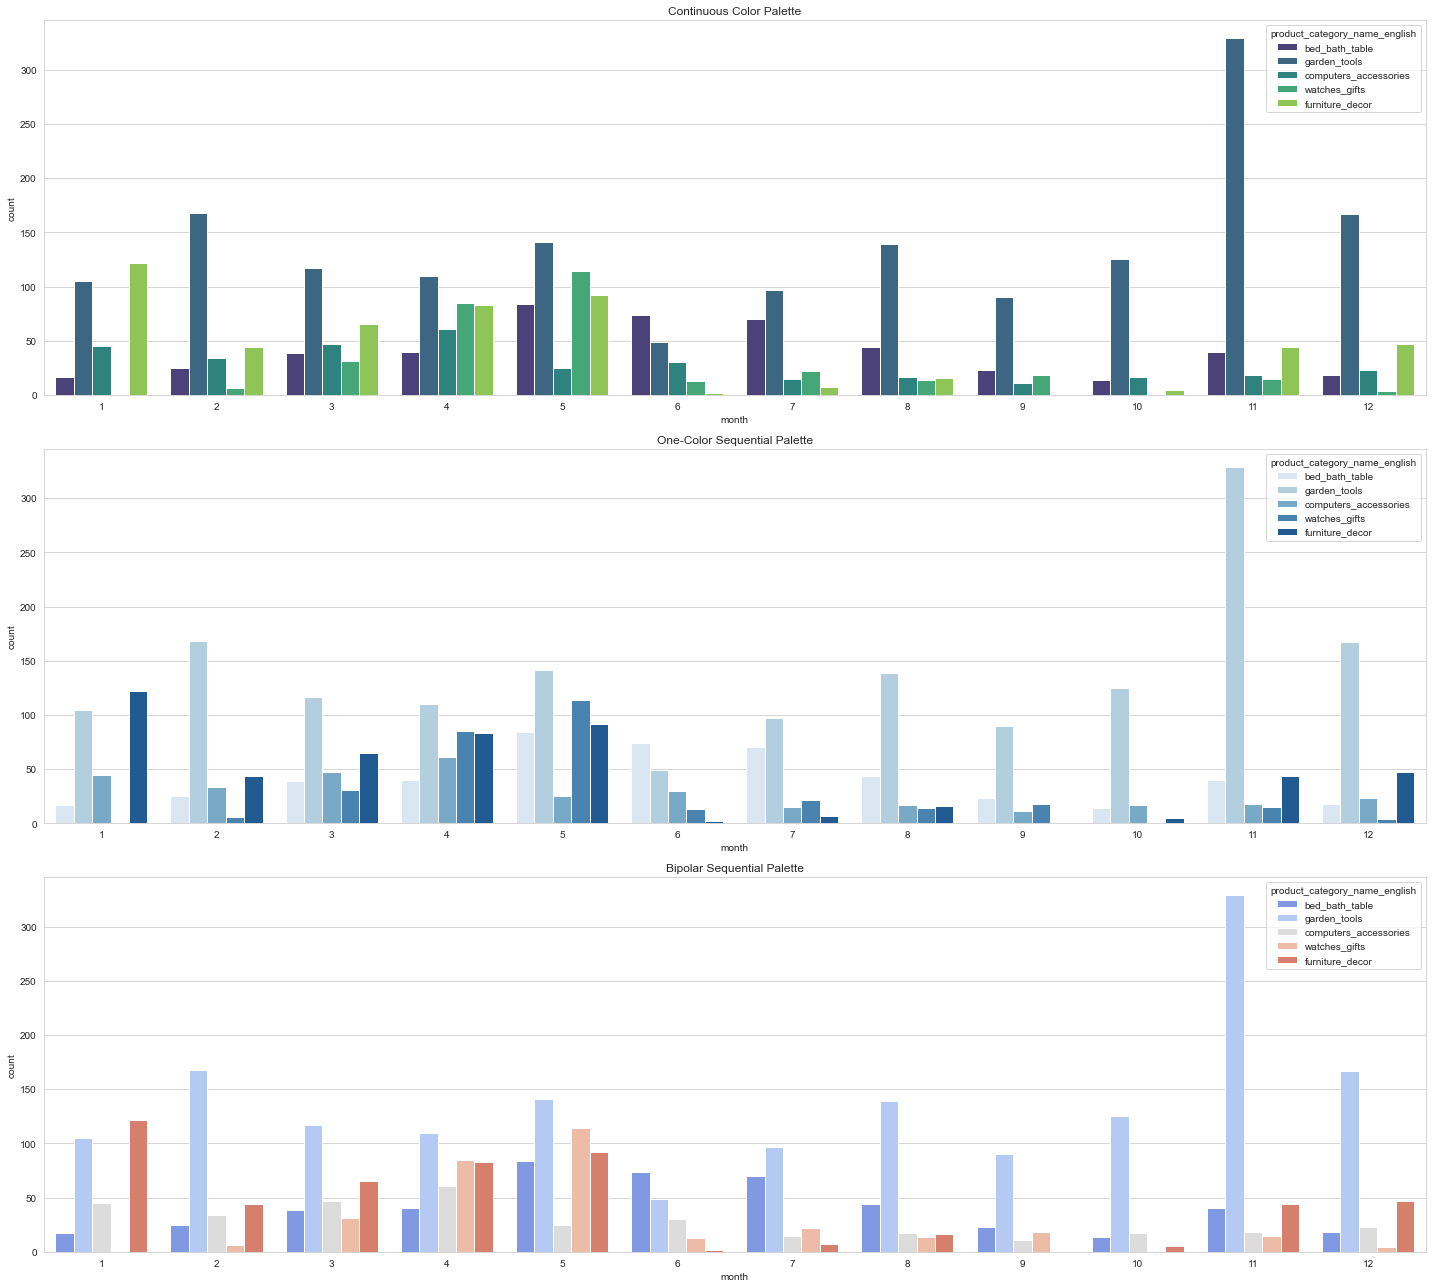

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18))

sns.countplot(x='month', hue='product_category_name_english', data=filtered_data_top5, ax=axes[0], palette='viridis')
axes[0].set_title('Continuous Color Palette')

sns.countplot(x='month', hue='product_category_name_english', data=filtered_data_top5, ax=axes[1], palette='Blues')
axes[1].set_title('One-Color Sequential Palette')

sns.countplot(x='month', hue='product_category_name_english', data=filtered_data_top5, ax=axes[2], palette='coolwarm')
axes[2].set_title('Bipolar Sequential Palette')

plt.tight_layout()
plt.show()


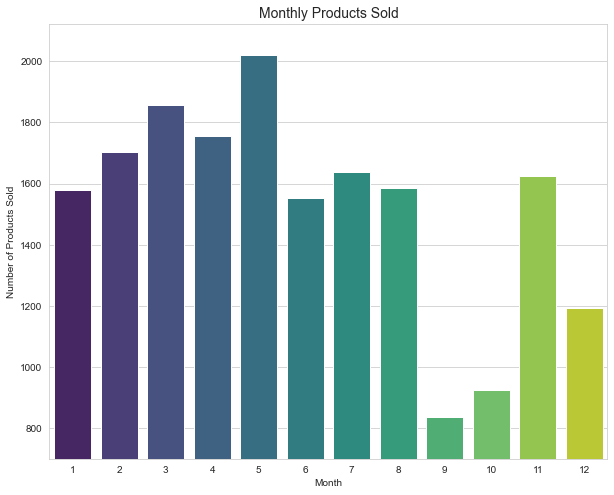

In [86]:
plt.figure(figsize=(10, 8))
palette_names = ['Continuous Color Palette', 'One-Color Sequential Palette','Bipolar Sequential Palette']

sns.countplot(x='month', data=filtered_data, palette='viridis')
plt.title('Monthly Products Sold', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.ylim(700)
plt.show()


## State-wise Distribution of Total Revenue

In [71]:
merged_data = pd.merge(orders, customers, on='customer_id')
merged_data = pd.merge(merged_data, order_items, on='order_id')
merged_data = pd.merge(merged_data, order_payments, on='order_id')
merged_data = pd.merge(merged_data, sellers, on='seller_id')
merged_data['total_revenue'] = merged_data['price'] + merged_data['freight_value']
merged_data = pd.merge(merged_data, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

statewise_revenue = merged_data.groupby('customer_state')['total_revenue'].sum().reset_index()

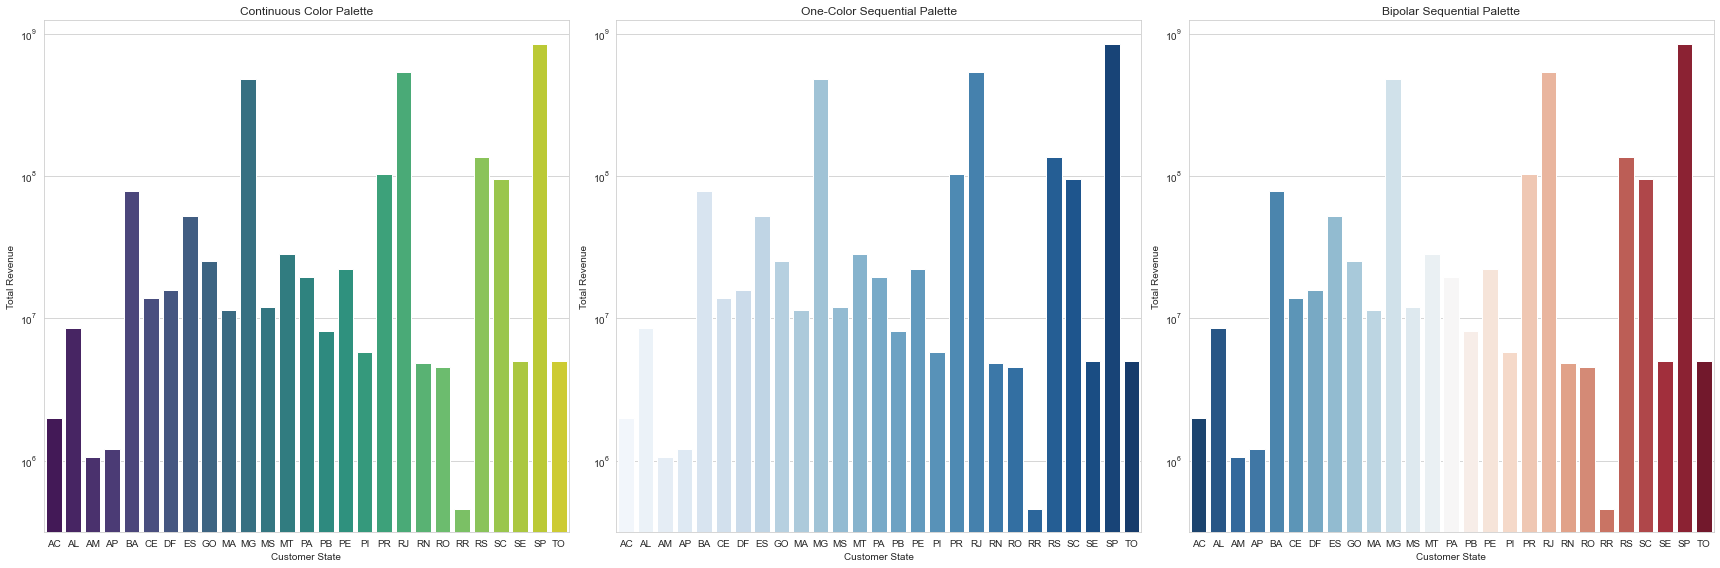

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
palettes = ['viridis', 'Blues', 'RdBu_r']

for i, palette in enumerate(palettes):
    ax = axes[i]
    sns.barplot(x='customer_state', y='total_revenue', data=statewise_revenue, ax=ax, palette=palette)
    
    ax.set_title(palette_names[i])
    ax.set_xlabel('Customer State')
    ax.set_ylabel('Total Revenue')
    ax.set_yscale('log')

plt.tight_layout()
plt.show()


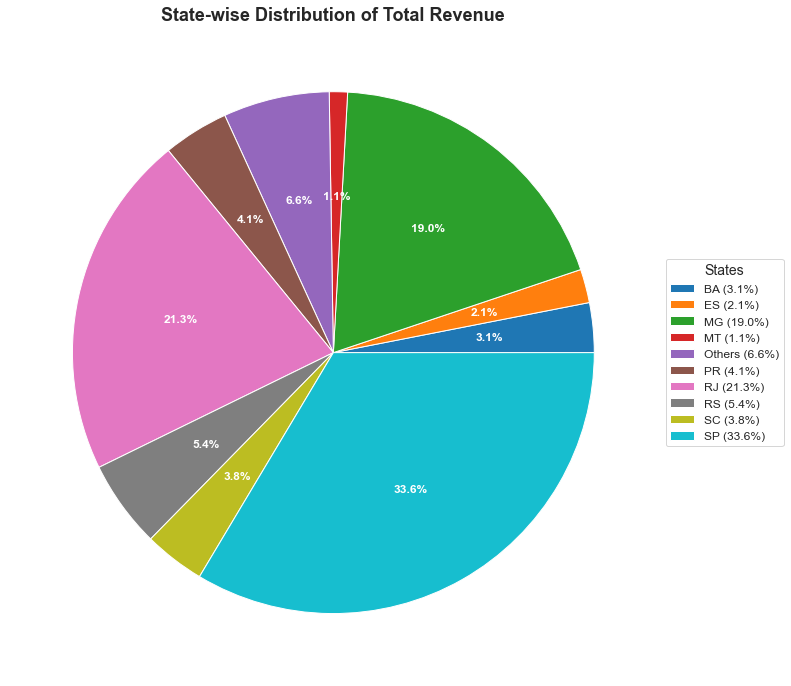

In [73]:
threshold_percentage = 1
low_revenue_states = statewise_revenue[statewise_revenue['total_revenue'] / statewise_revenue['total_revenue'].sum() * 100 < threshold_percentage]
statewise_revenue.loc[statewise_revenue['customer_state'].isin(low_revenue_states['customer_state']), 'customer_state'] = 'Others'
others_total_revenue = low_revenue_states['total_revenue'].sum()
statewise_revenue = statewise_revenue.groupby('customer_state', as_index=False).agg({'total_revenue': 'sum'})
statewise_revenue.loc[statewise_revenue['customer_state'] == 'Others', 'total_revenue'] = others_total_revenue

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"), facecolor='white')
labels = statewise_revenue['customer_state']
sizes = statewise_revenue['total_revenue']
colors = plt.cm.viridis.colors
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', textprops=dict(color="w"))

for text, autotext in zip(texts, autotexts):
    text.set(size=14)
    autotext.set(size=12, weight="bold")

legend_labels = [f'{state} ({percentage:.1f}%)' for state, percentage in zip(statewise_revenue['customer_state'], sizes / sizes.sum() * 100)]
ax.legend(wedges, legend_labels, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title_fontsize=14, prop={'size': 12})

ax.set_title("State-wise Distribution of Total Revenue", size=18, weight="bold")

plt.show()


## Distribution of Customers and Sellers

In [126]:
customers_geo = pd.merge(customers, geolocation, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
sellers_geo = pd.merge(sellers, geolocation, how='left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
customer_state_counts = customers_geo['customer_state'].value_counts().reset_index()
customer_state_counts.columns = ['state', 'customer_count']
seller_state_counts = sellers_geo['seller_state'].value_counts().reset_index()
seller_state_counts.columns = ['state', 'seller_count']

merged_state_counts = pd.merge(customer_state_counts, seller_state_counts, on='state', how='outer')
merged_state_counts = merged_state_counts.sort_values(by='state')
merged_state_counts.dropna(inplace=True)

merged_state_counts['log_customers'] = np.log10(merged_state_counts['customer_count'])
merged_state_counts['log_sellers'] = np.log10(merged_state_counts['seller_count'])

In [135]:
merged_state_counts.head()

,state,customer_count,seller_count,log_customers,log_sellers
23,AC,7649,164.0,3.883605,2.214844
24,AM,5587,27.0,3.747179,1.431364
6,BA,365884,2592.0,5.563343,3.413635
13,CE,63511,538.0,4.802849,2.730782
11,DF,93475,1244.0,4.970695,3.094820


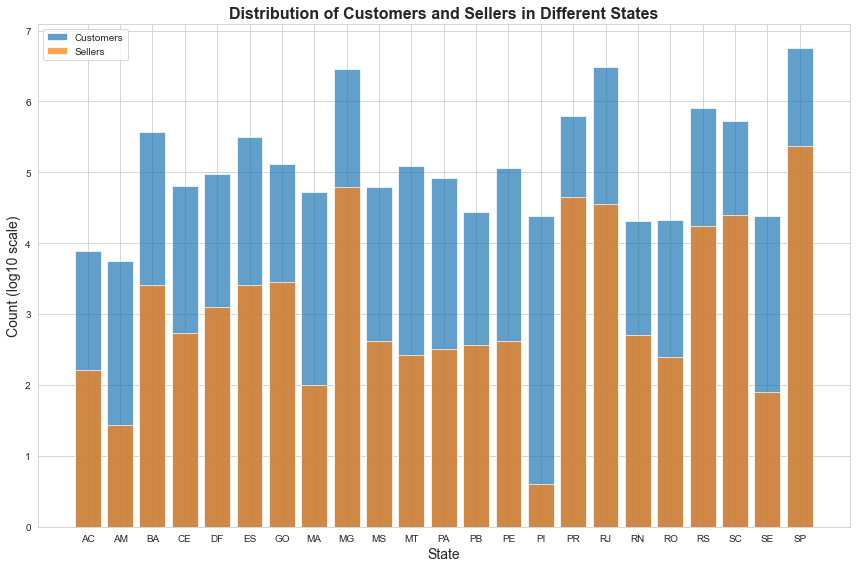

In [130]:
plt.figure(figsize=(12, 8))
plt.bar(merged_state_counts['state'], merged_state_counts['log_customers'], label='Customers', alpha=0.7)
plt.bar(merged_state_counts['state'], merged_state_counts['log_sellers'], label='Sellers', alpha=0.7)

plt.xlabel('State', fontsize=14)
plt.ylabel('Count (log10 scale)', fontsize=14)
plt.title('Distribution of Customers and Sellers in Different States', fontsize=16, weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

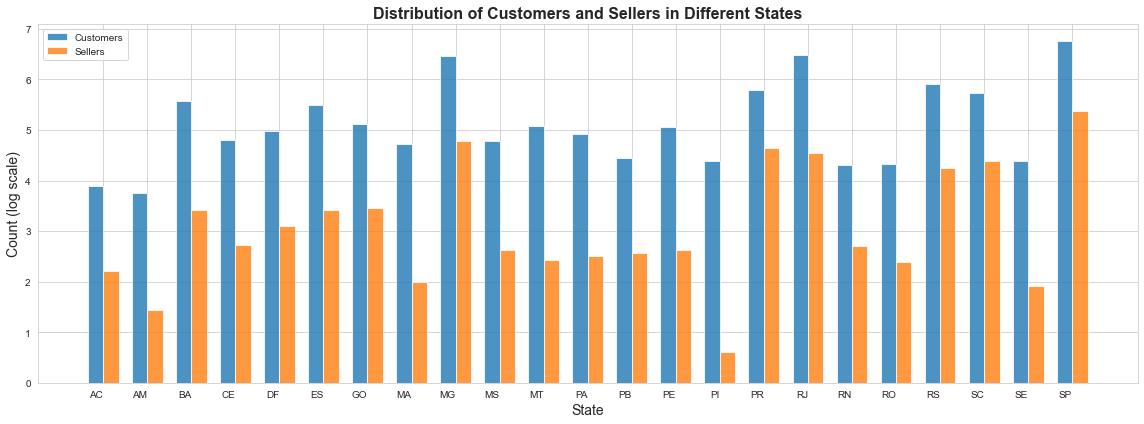

In [137]:
fig, ax = plt.subplots(figsize=(16, 6))

bar_width = 0.35
index = np.arange(len(merged_state_counts['state']))

bar1 = ax.bar(index, merged_state_counts['log_customers'], bar_width, label='Customers', alpha=0.8)
bar2 = ax.bar(index + bar_width, merged_state_counts['log_sellers'], bar_width, label='Sellers', alpha=0.8)

ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Count (log scale)', fontsize=14)
ax.set_title('Distribution of Customers and Sellers in Different States', fontsize=16, weight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_state_counts['state'], ha='right')
ax.legend()

plt.tight_layout()
plt.show()